In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.\Desktop\kaggle\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\Desktop\kaggle\input\calendar.csv
.\Desktop\kaggle\input\sales_train_evaluation.csv
.\Desktop\kaggle\input\sales_train_validation.csv
.\Desktop\kaggle\input\sample_submission.csv
.\Desktop\kaggle\input\sell_prices.csv


In [2]:
#Importing all the required modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from datetime import datetime
import calendar
import matplotlib.dates as mdates

In [3]:
#Reading the data
cal_data = pd.read_csv('.\Desktop\kaggle\input\calendar.csv')
prices = pd.read_csv('.\Desktop\kaggle\input\sell_prices.csv')
sales = pd.read_csv('.\Desktop\kaggle\input\sales_train_validation.csv')

In [4]:
print(cal_data.shape)
print(prices.shape)
print(sales.shape)

(1969, 14)
(6841121, 4)
(30490, 1919)


In [5]:
#Viewing the first five rows of sales data
sales.head() 

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

In [6]:
#Finding the unique stores, items, departments and categories

print('There are {0} unique items '.format(len(sales['item_id'].unique())))
print('There are {0} unique depts'.format(len(sales['dept_id'].unique())))
print('There are {0} unique categories'.format(len(sales['cat_id'].unique())))
print('There are {0} unique stores'.format(len(sales['store_id'].unique())))
print('There are {0} unique states'.format(len(sales['state_id'].unique())))

There are 3049 unique items 
There are 7 unique depts
There are 3 unique categories
There are 10 unique stores
There are 3 unique states


In [7]:
#Copying the sales dataframe so that modifications can be made and the original dataframe be kept intact
sales_df = sales.copy()
date_list = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]

#Renaming days to dates
sales_df.rename(columns=dict(zip(sales_df.columns[6:], date_list)),inplace=True)
sales_df.head() 

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  2011-01-29  2011-01-30  2011-01-31  2011-02-01  ...  2016-04-15  \
0       CA           0           0           0           0  ...           1   
1       CA           0           0           0           0  ...           0   
2       CA           0           0           0           0  ...           2   
3       CA           0           0           0           0  ...           1   
4       CA           0           0           0           0  ...           2   

   2016-04-16  2016-04-17  2016-04-18  2016-04-19  2016-04-20  2016-04-21  \
0           3           0           1           1           1           3   
1           0           0           0           0           1           0   
2           1           2           1           1           1           0   
3           0           5           4           1           0           1   
4           1           1           0           1           1           2   

   2016-04-22  2016-04-23  2016-04-24  
0           0           1           1  
1           0           0           0  
2           1           1           1  
3           3           7           2  
4           2           2           4  

[5 rows x 1919 columns]

In [8]:
#Aggregating data by different IDs to get better picture of how these sales vary

#Aggregating by mean the sales by department
dept_mean = sales_df.groupby(['dept_id']).mean().T
dept_mean.index = pd.to_datetime(dept_mean.index)

#Aggregating by mean the sales by categories
cat_mean = sales_df.groupby(['cat_id']).mean().T
cat_mean.index = pd.to_datetime(cat_mean.index)

#Aggregating by mean the sales by stores
store_mean = sales_df.groupby(['store_id']).mean().T
store_mean.index = pd.to_datetime(store_mean.index)

#Aggregating by mean the sales by states
state_mean = sales_df.groupby(['state_id']).mean().T
state_mean.index = pd.to_datetime(state_mean.index)

In [9]:
#Function for creating plots
names = ['Department','Category','Store','State']
j=0
def create_plots(df,freq):
    fig, ax = plt.subplots()
    for i in df.columns:
        df_plot = df[i].resample(freq).sum()
        df_plot.plot(ax=ax)
        fig.set_figheight(7)
        fig.set_figwidth(15)
    plt.grid(True)
    plt.title('Monthly mean sales: {0}'.format(names[j]))
    ax.legend(df.columns,loc='best')

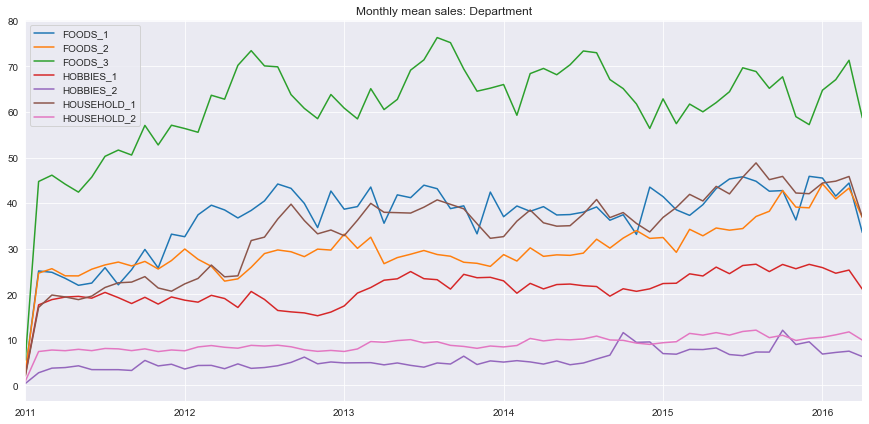

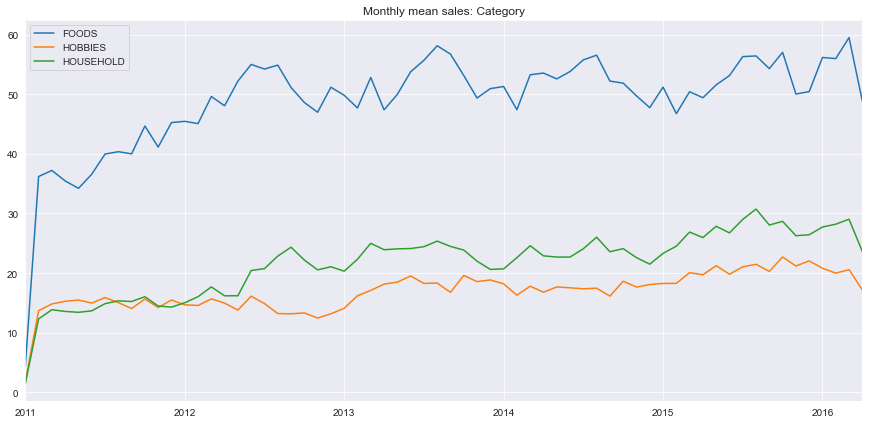

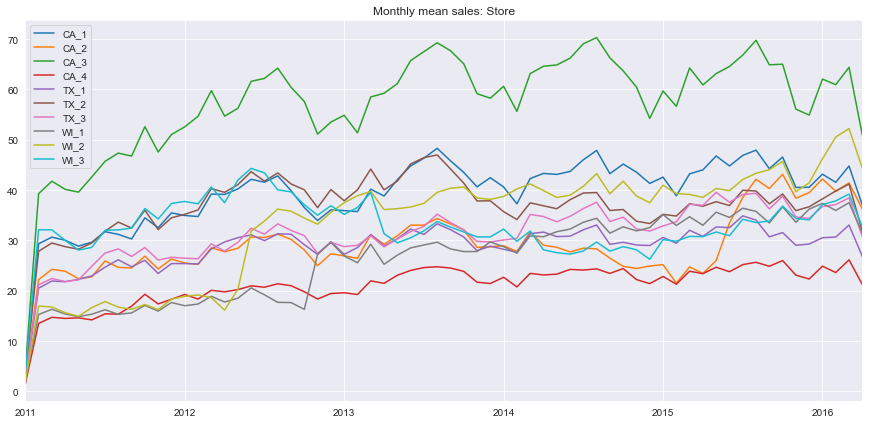

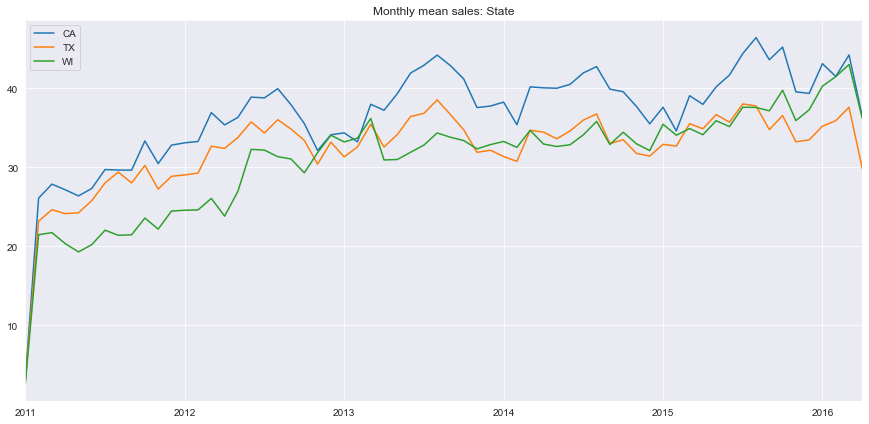

In [10]:
#Plotting the mean data
j=0
create_plots(dept_mean,'m')
j = j+1
create_plots(cat_mean,'m')
j = j+1
create_plots(store_mean,'m')
j = j+1
create_plots(state_mean,'m')

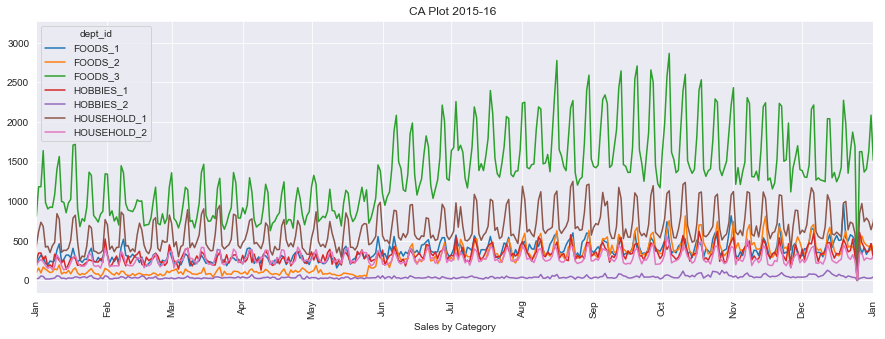

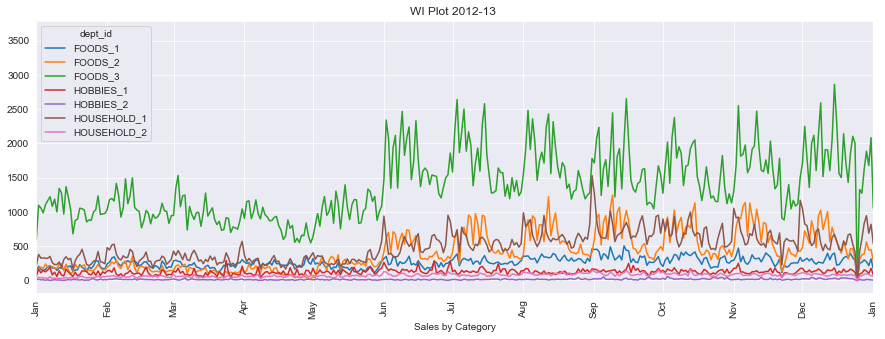

In [11]:
WI_2 = sales_df[(sales_df['store_id'] == 'WI_2')]
dept_WI2 = WI_2.groupby(['dept_id']).sum().T
dept_WI2.index = pd.to_datetime(dept_WI2.index)
dept_WI2.head()

CA_2 = sales_df[(sales_df['store_id'] == 'CA_2')]
dept_CA2 = CA_2.groupby(['dept_id']).sum().T
dept_CA2.index = pd.to_datetime(dept_CA2.index)
dept_CA2.head()

fig, ax = plt.subplots(figsize=(15,5))
dept_CA2.plot(xlim=['2015-01-01','2016-01-01'],ax=ax,rot=90)
plt.grid(True)
plt.xlabel('Sales by Category')
# set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.title('CA Plot 2015-16 ')
plt.show()

fig, ax = plt.subplots(figsize=(15,5))
dept_WI2.plot(xlim=['2012-01-01','2013-01-01'],ax=ax,rot=90)
plt.grid(True)
plt.xlabel('Sales by Category')
# set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.title('WI Plot 2012-13 ')
plt.show()

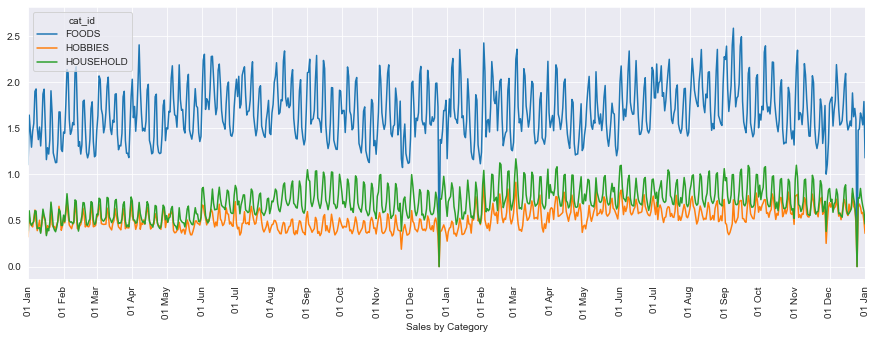

In [12]:
# We can also plot data for a particular date range

fig, ax = plt.subplots(figsize=(15,5))
cat_mean.plot(xlim=['2012-01-01','2014-01-01'],ax=ax,rot=90)
plt.grid(True)
plt.xlabel('Sales by Category')
# set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
# #set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

Text(0.5, 1.0, 'Total Quantity Sold by Department in each store')

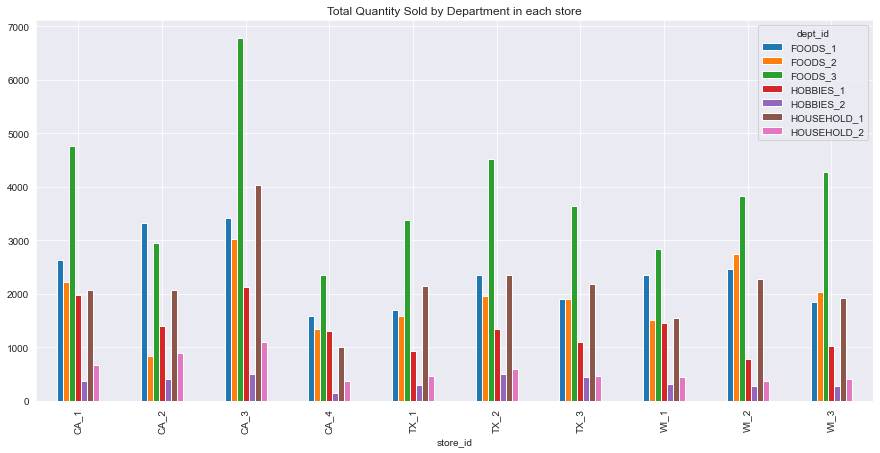

In [13]:
sales_df.groupby(['store_id','dept_id']).agg('mean').agg('sum',axis=1).unstack().plot(kind='bar',figsize=(15,7))
plt.title('Total Quantity Sold by Department in each store')

In [14]:
#Viewing the first five rows of calendar data
cal_data.head(5)

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [15]:
#Finding the number of non-na rows
print(cal_data['event_name_1'].notnull().sum())
print(cal_data['event_name_2'].notnull().sum())

162
5


In [16]:
print(len(cal_data['event_name_1'].unique()))
print(len(cal_data['event_type_1'].unique()))

31
5


In [17]:
#Viewing the first five rows of prices
prices.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

(0.0, 25.0)

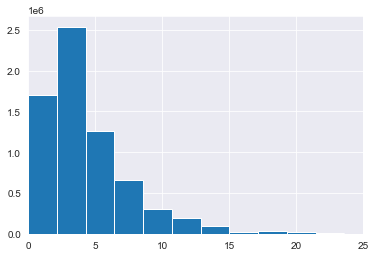

In [18]:
#Plotting the histogram
prices['sell_price'].hist(bins=50)
plt.xlim(0,25)

In [19]:
#Item with max price
print(prices.max())
#Item with min price
print(prices.min())

store_id                 WI_3
item_id       HOUSEHOLD_2_516
wm_yr_wk                11621
sell_price             107.32
dtype: object
store_id             CA_1
item_id       FOODS_1_001
wm_yr_wk            11101
sell_price           0.01
dtype: object


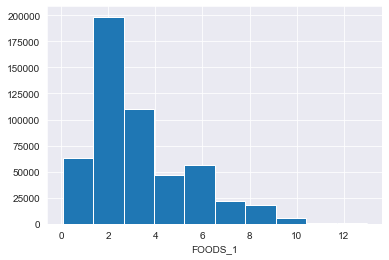

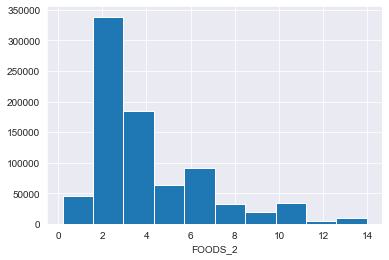

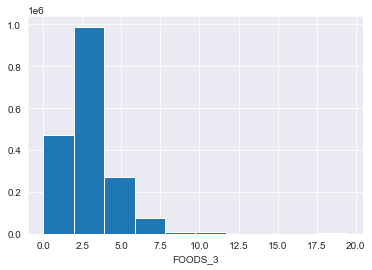

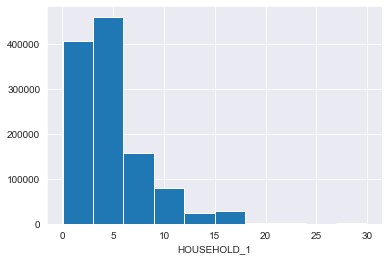

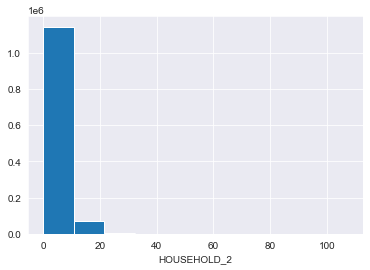

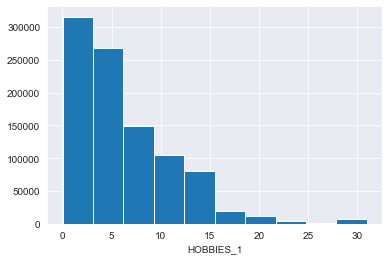

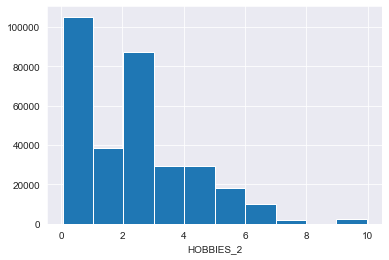

In [20]:
 #Checking the price range of each department
prices[(prices['item_id'].str.startswith('FOODS_1'))]['sell_price'].hist()
plt.xlabel('FOODS_1')
plt.show()
prices[(prices['item_id'].str.startswith('FOODS_2'))]['sell_price'].hist()
plt.xlabel('FOODS_2')
plt.show()
prices[(prices['item_id'].str.startswith('FOODS_3'))]['sell_price'].hist()
plt.xlabel('FOODS_3')
plt.show()
prices[(prices['item_id'].str.startswith('HOUSEHOLD_1'))]['sell_price'].hist()
plt.xlabel('HOUSEHOLD_1')
plt.show()
prices[(prices['item_id'].str.startswith('HOUSEHOLD_2'))]['sell_price'].hist()
plt.xlabel('HOUSEHOLD_2')
plt.show()
prices[(prices['item_id'].str.startswith('HOBBIES_1'))]['sell_price'].hist()
plt.xlabel('HOBBIES_1')
plt.show()
prices[(prices['item_id'].str.startswith('HOBBIES_2'))]['sell_price'].hist()
plt.xlabel('HOBBIES_2')
plt.show()

In [21]:
import gc
import lightgbm as lgb
from sklearn import preprocessing, metrics

In [22]:
#Function for reducing memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [23]:
#Function for reading data
def read_data():
    print('Reading files...')
    calendar = pd.read_csv('.\Desktop\kaggle\input\calendar.csv')
    calendar = reduce_mem_usage(calendar)
    print('Calendar has {} rows and {} columns'.format(calendar.shape[0], calendar.shape[1]))
    sell_prices = pd.read_csv('.\Desktop\kaggle\input\sell_prices.csv')
    sell_prices = reduce_mem_usage(sell_prices)
    print('Sell prices has {} rows and {} columns'.format(sell_prices.shape[0], sell_prices.shape[1]))
    sales_train_validation = pd.read_csv('.\Desktop\kaggle\input\sales_train_validation.csv')
    print('Sales train validation has {} rows and {} columns'.format(sales_train_validation.shape[0], sales_train_validation.shape[1]))
    submission = pd.read_csv('.\Desktop\kaggle\input\sample_submission.csv')
    return calendar, sell_prices, sales_train_validation, submission

In [24]:
#Function to convert multivariate to univariate
def melt_and_merge(calendar, sell_prices, sales_train_validation, submission, nrows = 45735000, merge = False):
    
    # melt sales data, get it ready for training
    sales_train_validation = pd.melt(sales_train_validation, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    print('Melted sales train validation has {} rows and {} columns'.format(sales_train_validation.shape[0], sales_train_validation.shape[1]))
    sales_train_validation = reduce_mem_usage(sales_train_validation)
    
    # seperate test dataframes
    test1_rows = [row for row in submission['id'] if 'validation' in row]
    test2_rows = [row for row in submission['id'] if 'evaluation' in row]
    test1 = submission[submission['id'].isin(test1_rows)]
    test2 = submission[submission['id'].isin(test2_rows)]
    
    # change column names
    test1.columns = ['id', 'd_1914', 'd_1915', 'd_1916', 'd_1917', 'd_1918', 'd_1919', 'd_1920', 'd_1921', 'd_1922', 'd_1923', 'd_1924', 'd_1925', 'd_1926', 'd_1927', 'd_1928', 'd_1929', 'd_1930', 'd_1931', 
                      'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938', 'd_1939', 'd_1940', 'd_1941']
    test2.columns = ['id', 'd_1942', 'd_1943', 'd_1944', 'd_1945', 'd_1946', 'd_1947', 'd_1948', 'd_1949', 'd_1950', 'd_1951', 'd_1952', 'd_1953', 'd_1954', 'd_1955', 'd_1956', 'd_1957', 'd_1958', 'd_1959', 
                      'd_1960', 'd_1961', 'd_1962', 'd_1963', 'd_1964', 'd_1965', 'd_1966', 'd_1967', 'd_1968', 'd_1969']
    
    # get product table
    product = sales_train_validation[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].drop_duplicates()
    
    # merge with product table
    test2['id'] = test2['id'].str.replace('_evaluation','_validation')
    test1 = test1.merge(product, how = 'left', on = 'id')
    test2 = test2.merge(product, how = 'left', on = 'id')
    test2['id'] = test2['id'].str.replace('_validation','_evaluation')
    
    # 
    test1 = pd.melt(test1, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    test2 = pd.melt(test2, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    
    sales_train_validation['part'] = 'train'
    test1['part'] = 'test1'
    test2['part'] = 'test2'
    
    data = pd.concat([sales_train_validation, test1, test2], axis = 0)
    
    del sales_train_validation, test1, test2
    
    # get only a sample for fst training
    data = data.loc[nrows:]
    
    # drop some calendar features
    calendar.drop(['weekday', 'wday', 'month', 'year'], inplace = True, axis = 1)
    
    # delete test2 for now
    data = data[data['part'] != 'test2']
    
    if merge:
        # notebook crash with the entire dataset (maybee use tensorflow, dask, pyspark xD)
        data = pd.merge(data, calendar, how = 'left', left_on = ['day'], right_on = ['d'])
        data.drop(['d', 'day'], inplace = True, axis = 1)
        # get the sell price data (this feature should be very important)
        data = data.merge(sell_prices, on = ['store_id', 'item_id', 'wm_yr_wk'], how = 'left')
        print('Our final dataset to train has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
    else: 
        pass
    
    gc.collect()
    
    return data

In [25]:
#Read Data
calendar, sell_prices, sales_train_validation, submission = read_data()

Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns


In [26]:
#Final Merged Data
data = melt_and_merge(calendar, sell_prices, sales_train_validation, submission, nrows = 45000000, merge = True)

Melted sales train validation has 58327370 rows and 8 columns
Mem. usage decreased to 3226.27 Mb (9.4% reduction)


C:\Users\SAMRIN~1.SID\AppData\Local\Temp/ipykernel_7132/307795125.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['id'] = test2['id'].str.replace('_evaluation','_validation')


Our final dataset to train has 14181090 rows and 18 columns


In [27]:
#Function for transforming categorical variables
def transform(data):
    
    nan_features = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in nan_features:
        data[feature].fillna('unknown', inplace = True)
        
    cat = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'event_name_1', 
           'event_type_1', 'event_name_2', 'event_type_2']
    for feature in cat:
        encoder = preprocessing.LabelEncoder()
        data[feature] = encoder.fit_transform(data[feature])
    
    return data

In [28]:
#Function for performing feature engineering
def simple_fe(data):
    grouped = data.groupby(['id'])['demand']

    # Lag features
    data['lag_t28'] = grouped.transform(lambda x: x.shift(28))
    data['lag_t35'] = grouped.transform(lambda x: x.shift(35))
    data['lag_t42'] = grouped.transform(lambda x: x.shift(42))
    data['lag_t56'] = grouped.transform(lambda x: x.shift(56))

    #Rolling Features
    data['rolling_mean_t7'] = grouped.transform(lambda x: x.shift(28).rolling(7).mean())
    data['rolling_mean_t14'] = grouped.transform(lambda x: x.shift(28).rolling(14).mean())
    data['rolling_mean_t28'] = grouped.transform(lambda x: x.shift(28).rolling(28).mean())
    data['rolling_mean_t60'] = grouped.transform(lambda x: x.shift(28).rolling(60).mean())
    data['rolling_mean_t90'] = grouped.transform(lambda x: x.shift(28).rolling(90).mean())
    data['rolling_mean_t180'] = grouped.transform(lambda x: x.shift(28).rolling(180).mean())
    
    # time features
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data['date'].dt.month
    data['week'] = data['date'].dt.week
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    
    return data

In [29]:
#Function for training the model
def run_lgb(data):
    
    # going to evaluate with the last 28 days
    x_train = data[data['date'] <= '2016-03-27']
    y_train = x_train['demand']
    x_val = data[(data['date'] > '2016-03-27') & (data['date'] <= '2016-04-24')]
    y_val = x_val['demand']
    test = data[(data['date'] > '2016-04-24')]
    del data
    gc.collect()

    # define random hyperparammeters
    params = {
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'seed': 236,
        'learning_rate': 0.05,
        'bagging_fraction': 0.75,
        'bagging_freq': 10, 
        'colsample_bytree': 0.75,
        'num_leaves': 126}

    train_set = lgb.Dataset(x_train[features], y_train)
    val_set = lgb.Dataset(x_val[features], y_val)
    
    del x_train, y_train

    model = lgb.train(params, train_set, num_boost_round = 2500, 
                       valid_sets = [train_set, val_set], verbose_eval = 100)
    val_pred = model.predict(x_val[features])
    val_score = np.sqrt(metrics.mean_squared_error(val_pred, y_val))
    print(f'Our val rmse score is {val_score}')
    y_pred = model.predict(test[features])
    test['demand'] = y_pred

    return (test,model)

In [30]:
#Function for predicting the forecasts
def predict(test, submission):
    predictions = test[['id', 'date', 'demand']]
    predictions = pd.pivot(predictions, index = 'id', columns = 'date', values = 'demand').reset_index()
    predictions.columns = ['id'] + ['F' + str(i + 1) for i in range(28)]

    evaluation_rows = [row for row in submission['id'] if 'evaluation' in row] 
    evaluation = submission[submission['id'].isin(evaluation_rows)]

    validation = submission[['id']].merge(predictions, on = 'id')
    final = pd.concat([validation, evaluation])
    
    final.to_csv('submission.csv', index = False)
    return (final,validation)

In [31]:
#Features to be selected in the model
features = ['item_id', 'store_id', 'month', 'week', 'day','dayofweek','quarter',
            'sell_price','lag_t28','lag_t35','lag_t42','lag_t56',
            'rolling_mean_t14','rolling_mean_t7','rolling_mean_t28',
            'rolling_mean_t60','rolling_mean_t90','rolling_mean_t180',
            'event_type_1','event_name_1','event_type_2','event_name_2']

In [32]:
#Transform categorical variables
data = transform(data)

In [33]:
#Perform feature engineering
data = simple_fe(data)

C:\Users\SAMRIN~1.SID\AppData\Local\Temp/ipykernel_7132/2039771705.py:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['week'] = data['date'].dt.week


In [34]:
#Reduce the memory to avoid out of memory error
data = reduce_mem_usage(data)

Mem. usage decreased to 1027.83 Mb (62.6% reduction)


In [35]:
#Train the model
(test,model) = run_lgb(data)

c:\program files\python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.671724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2476
[LightGBM] [Info] Number of data points in the train set: 12473650, number of used features: 20
[LightGBM] [Info] Start training from score 1.268385
[100]	training's rmse: 2.23838	valid_1's rmse: 2.13354
[200]	training's rmse: 2.16939	valid_1's rmse: 2.12673
[300]	training's rmse: 2.13109	valid_1's rmse: 2.12461
[400]	training's rmse: 2.09752	valid_1's rmse: 2.12271
[500]	training's rmse: 2.06924	valid_1's rmse: 2.12189
[600]	training's rmse: 2.04846	valid_1's rmse: 2.12115
[700]	training's rmse: 2.02677	valid_1's rmse: 2.11851
[800]	training's rmse: 2.01132	valid_1's rmse: 2.11917
[900]	training's rmse: 1.9956	valid_1's rmse: 2.11857
[1000]	training's rmse: 1.98155	valid_1's rmse: 2.11733
[1100]	training's rmse: 1.9686	valid_1's rmse: 2.11698
[1200]	training's rmse: 1.95668	valid_1's rmse:

C:\Users\SAMRIN~1.SID\AppData\Local\Temp/ipykernel_7132/127618299.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['demand'] = y_pred


In [36]:
#Get the final submission file and the only evaluation part for plotting
(final,validation) = predict(test, submission)

In [37]:
#Create a link to download submission file
from IPython.display import FileLink
FileLink(r'submission.csv')

C:\Users\samrin.siddiqha\submission.csv

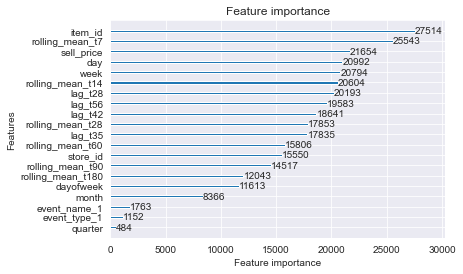

In [38]:
#Plot the feature importance
ax = lgb.plot_importance(model, max_num_features=20)
plt.show()

In [39]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [40]:
#Copying predictions
pred = validation.copy()

In [41]:
#Prepare data for Aggregating
pred.index = pred['id']
sales.index = sales['id']
pred['dept_id'] = sales['dept_id']
pred['store_id'] = sales['store_id']
pred['state_id'] = sales['state_id']
pred['cat_id'] = sales['cat_id']
del pred['id']
del sales['id']
pred = pred.reset_index()
sales = sales.reset_index()

In [42]:
#Group Prediction Data
store_dept_pred = pred.groupby(['store_id','dept_id']).agg('sum')
store_cat_pred = pred.groupby(['store_id','cat_id']).agg('sum')
state_dept_pred = pred.groupby(['state_id','dept_id']).agg('sum')
state_cat_pred = pred.groupby(['state_id','cat_id']).agg('sum')
#Group Original Data
store_dept_original = sales.groupby(['store_id','dept_id']).agg('sum').iloc[:,-28:]
store_cat_original = sales.groupby(['store_id','cat_id']).agg('sum').iloc[:,-28:]
state_dept_original = sales.groupby(['state_id','dept_id']).agg('sum').iloc[:,-28:]
state_cat_original = sales.groupby(['state_id','cat_id']).agg('sum').iloc[:,-28:]

In [43]:
#Rename F1 - F28 to DateRange
cols = pd.date_range(start = '2016-03-28',end = '2016-04-24')

store_dept_pred.columns = cols
store_cat_pred.columns = cols
state_dept_pred.columns = cols
state_cat_pred.columns = cols

store_dept_original.columns = cols
store_cat_original.columns = cols
state_dept_original.columns = cols
state_cat_original.columns = cols

In [44]:
 #Store the column names to iterate over them to create plots
store_dept_columns = store_dept_pred.T.columns.to_list()
store_cat_columns = store_cat_pred.T.columns.to_list()
state_dept_columns = state_dept_pred.T.columns.to_list()
state_cat_columns = state_cat_pred.T.columns.to_list()

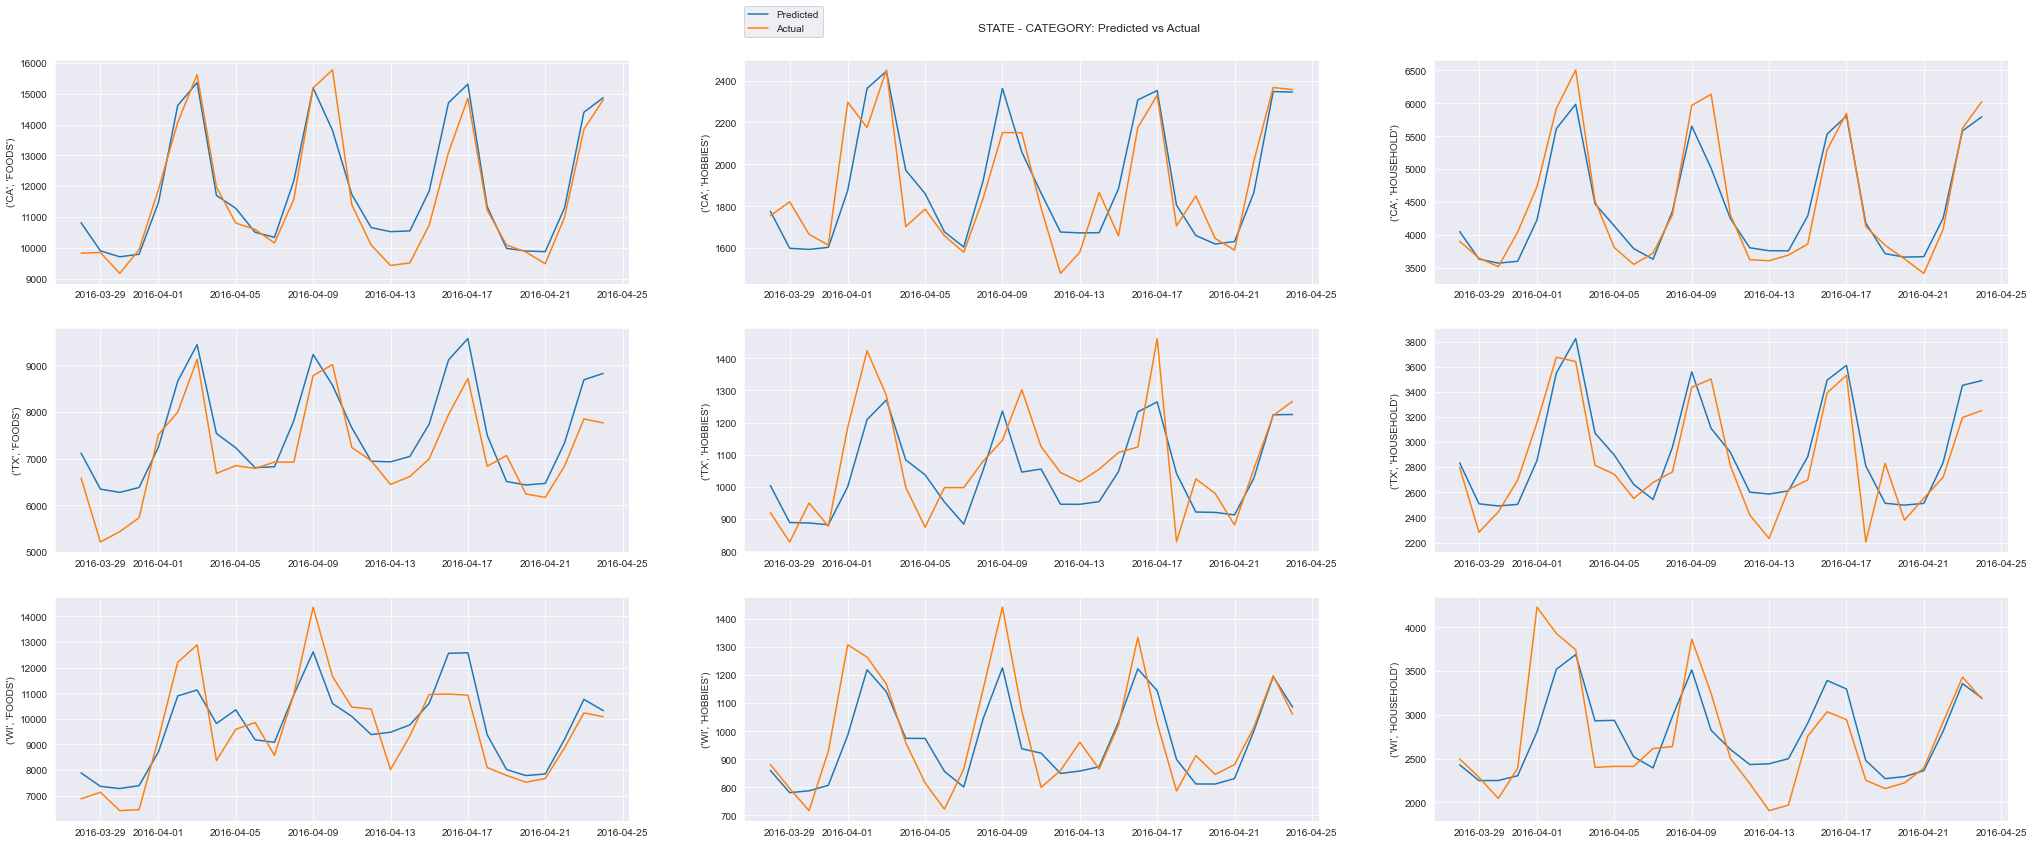

In [45]:
#State Category Plots
plt.figure(figsize=(35,14))       # set dimensions of the figure
for i in range(1,len(state_cat_columns)+1):
    plt.subplot(3,3,i)         # create subplots on a grid with 3 rows and 3 columns
    plt.plot(state_cat_pred.T[state_cat_columns[i-1]])
    plt.plot(state_cat_original.T[state_cat_columns[i-1]])
    plt.ylabel(state_cat_columns[i-1])
plt.legend(loc=(-1.2, 3.5),labels=["Predicted","Actual"])
plt.title('STATE - CATEGORY: Predicted vs Actual',x=-0.6,y=3.50)
plt.show()

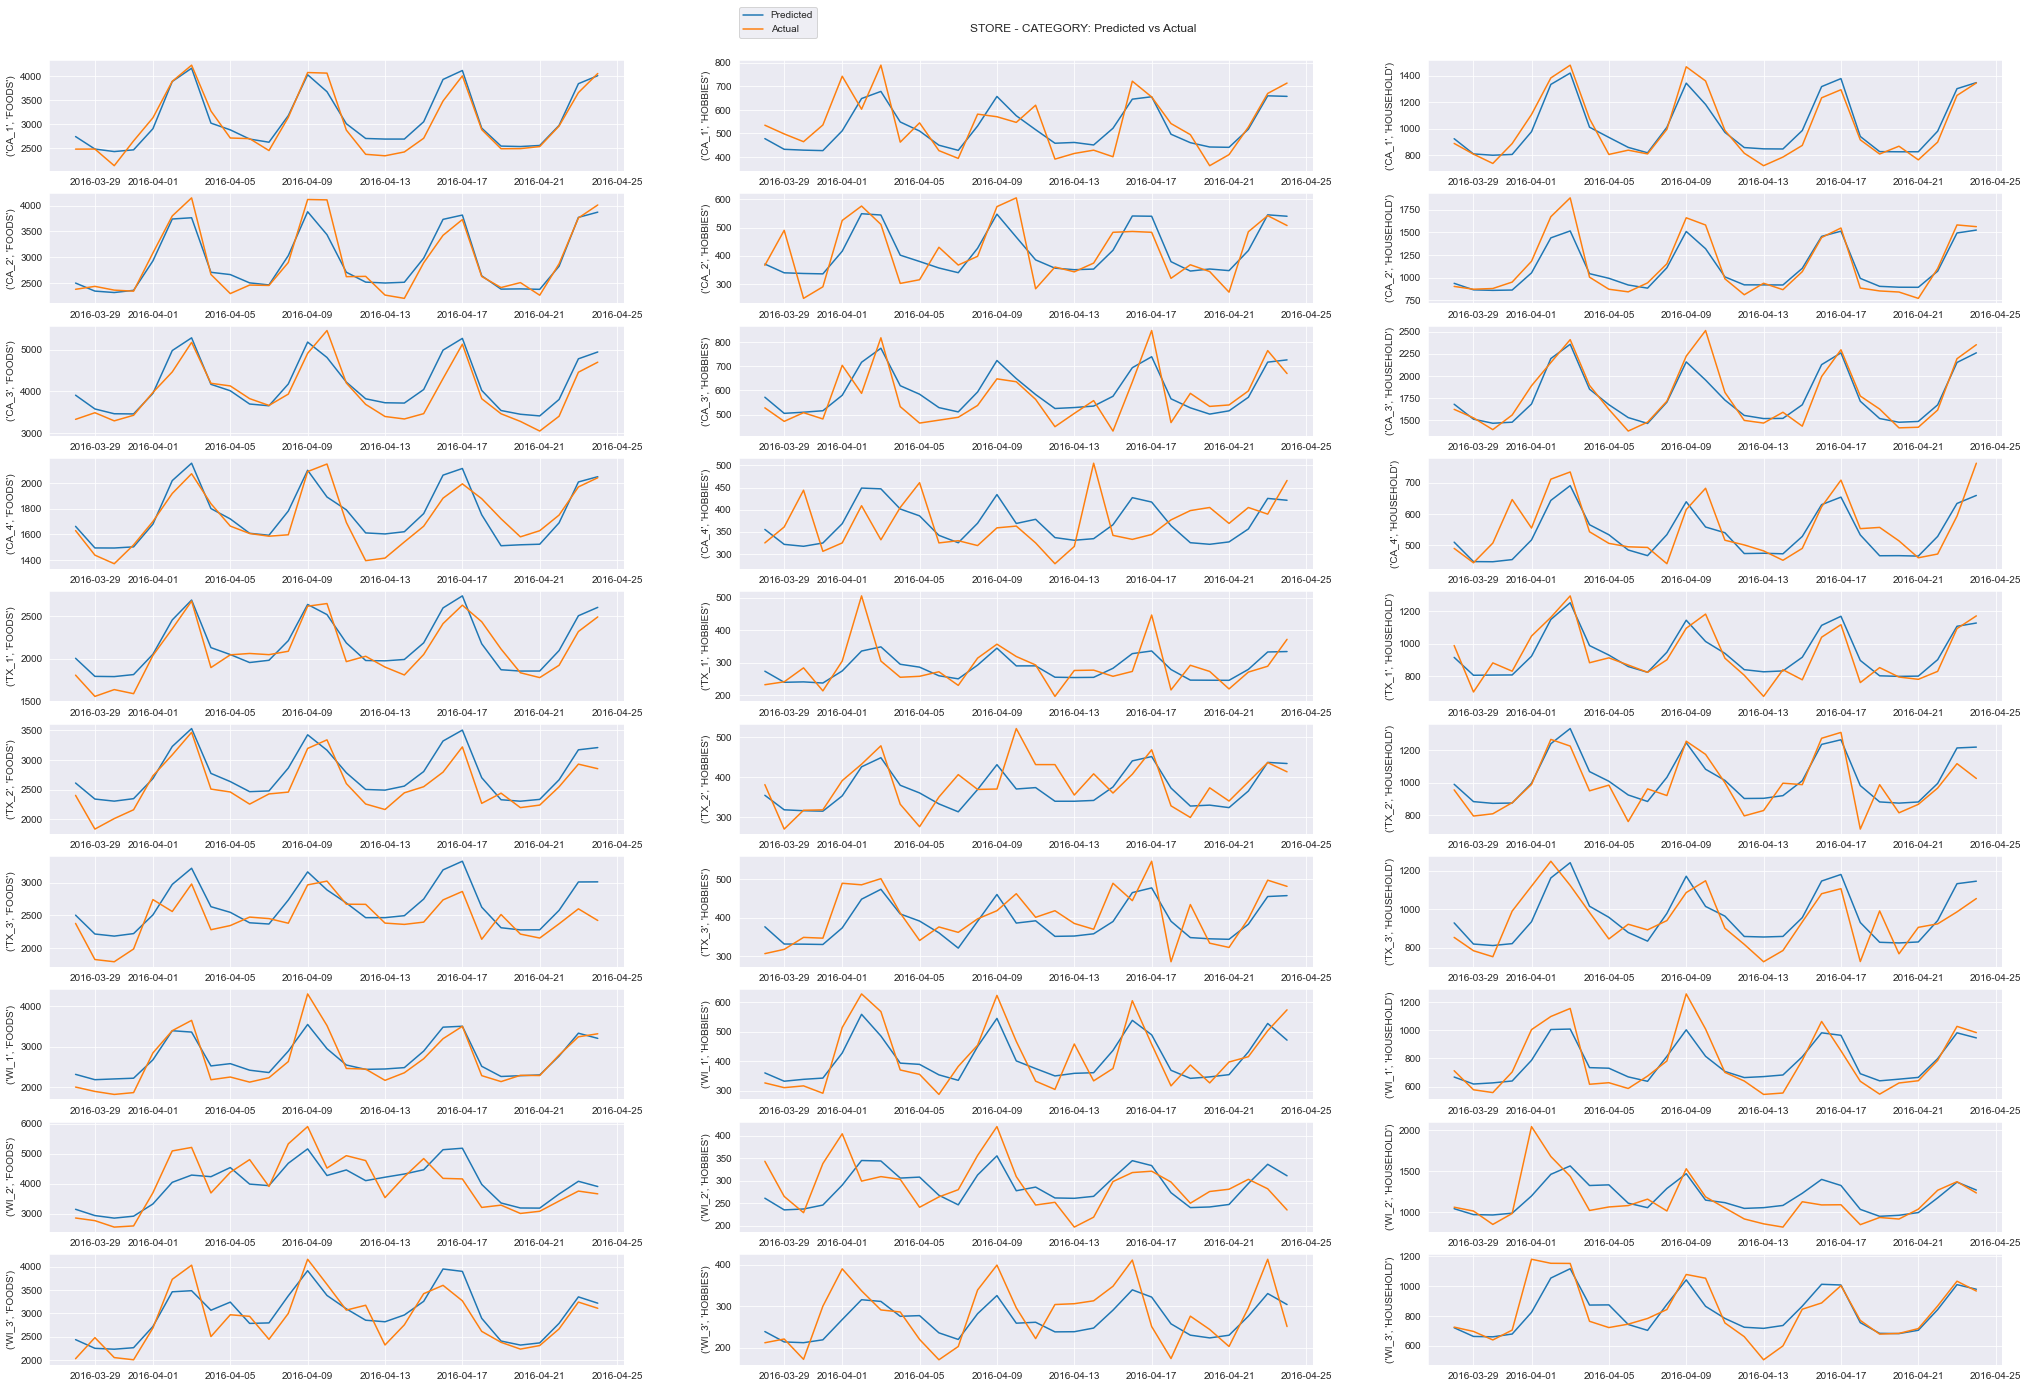

In [46]:
 #Store Category Plots
plt.figure(figsize=(35,24))       # set dimensions of the figure
for i in range(1,len(store_cat_columns)+1):
    plt.subplot(10,3,i)         # create subplots on a grid with 10 rows and 3 columns
    plt.plot(store_cat_pred.T[store_cat_columns[i-1]])
    plt.plot(store_cat_original.T[store_cat_columns[i-1]])
    plt.ylabel(store_cat_columns[i-1])
plt.legend(loc=(-1.2, 12.0),labels=["Predicted","Actual"])
plt.title('STORE - CATEGORY: Predicted vs Actual',x=-0.6,y=12.0)
plt.show()

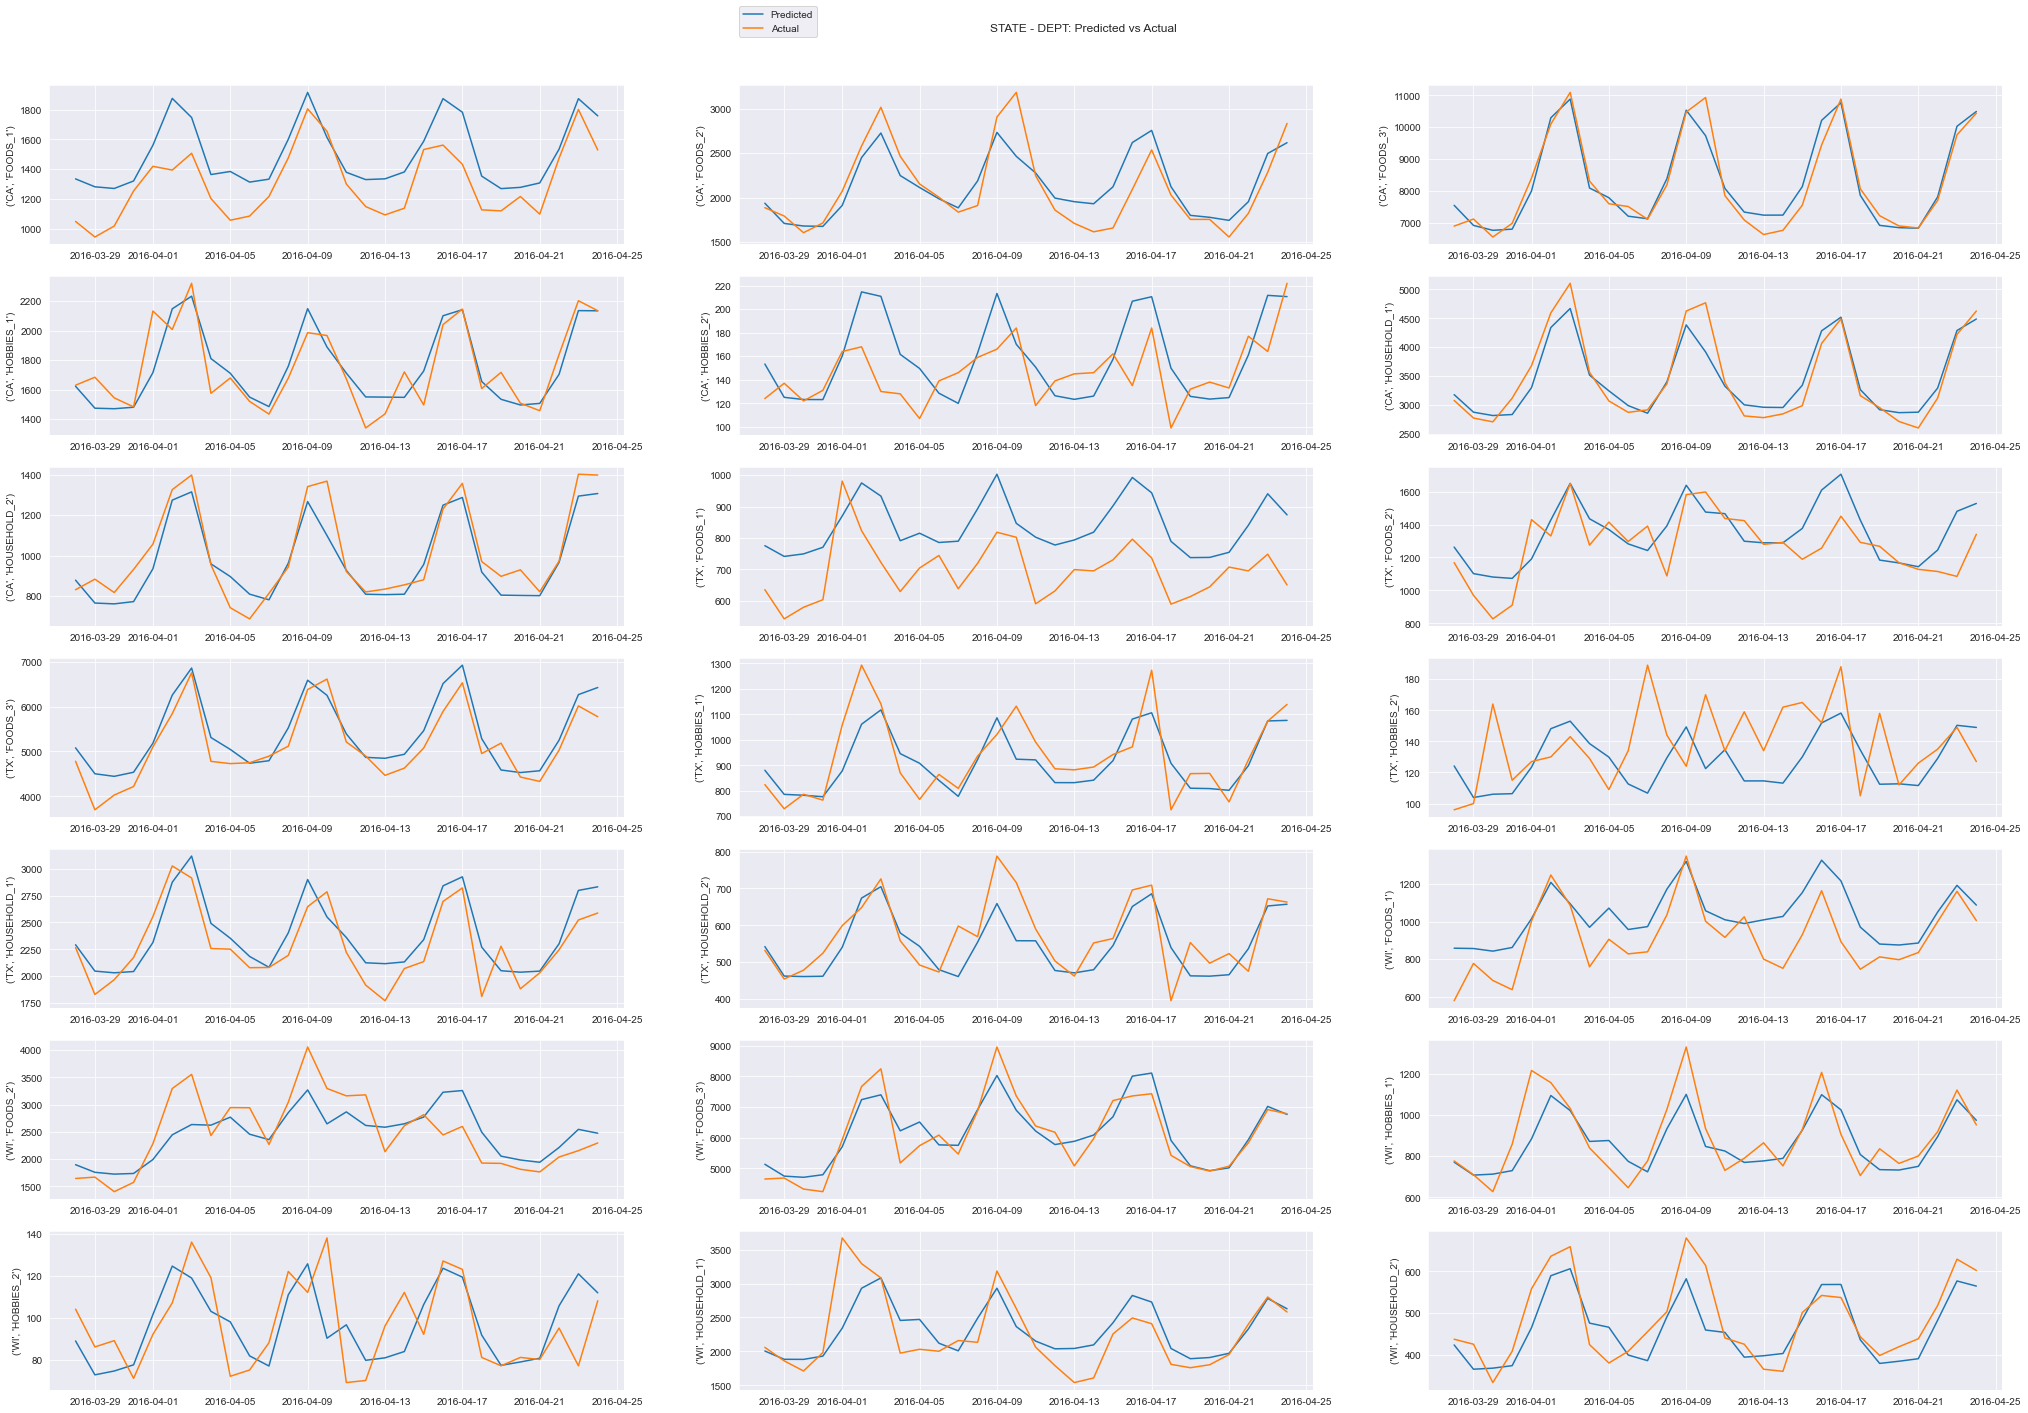

In [47]:
#State Department Plots
plt.figure(figsize=(35,24))       # set dimensions of the figure
for i in range(1,len(state_dept_columns)+1):
    plt.subplot(7,3,i)         # create subplots on a grid with 7 rows and 3 columns
    plt.plot(state_dept_pred.T[state_dept_columns[i-1]])
    plt.plot(state_dept_original.T[state_dept_columns[i-1]])
    plt.ylabel(state_dept_columns[i-1])
plt.legend(loc=(-1.2, 8.5),labels=["Predicted","Actual"])
plt.title('STATE - DEPT: Predicted vs Actual',x=-0.6,y=8.5)
plt.show()

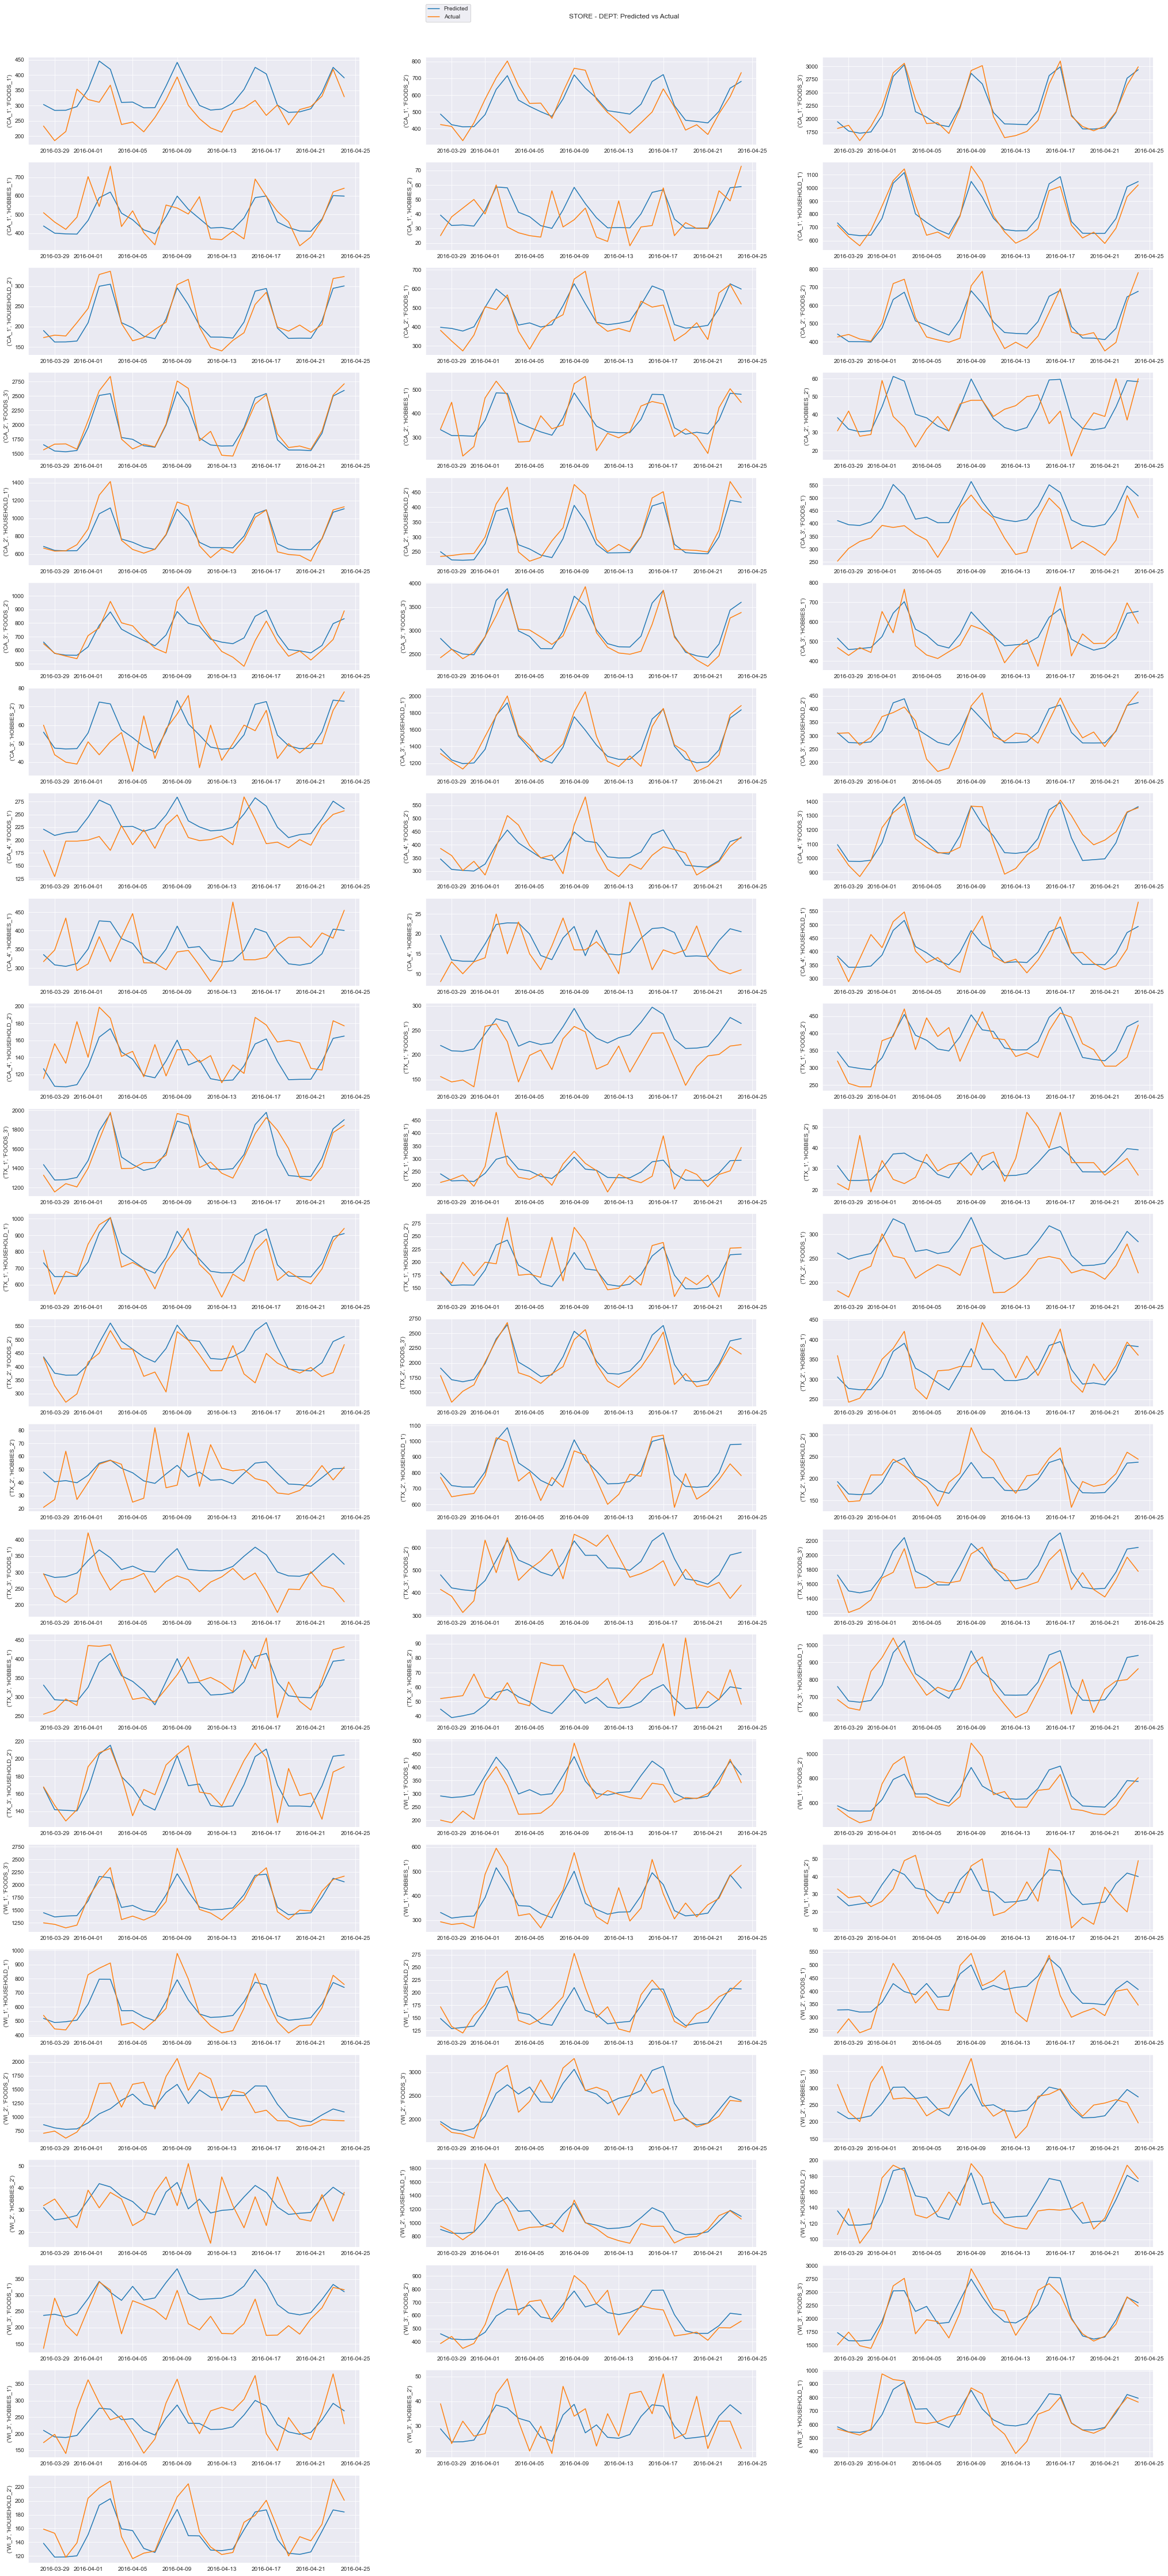

In [48]:
#Store Department Plots
plt.figure(figsize=(35,80))       # set dimensions of the figure
for i in range(1,len(store_dept_columns)+1):
    plt.subplot(24,3,i)         # create subplots on a grid with 24 rows and 3 columns
    plt.plot(store_dept_pred.T[store_dept_columns[i-1]])
    plt.plot(store_dept_original.T[store_dept_columns[i-1]])
    plt.ylabel(store_dept_columns[i-1])
plt.legend(loc=(1.2, 29.0),labels=["Predicted","Actual"])
plt.title('STORE - DEPT: Predicted vs Actual',x=1.8,y=29.0)
plt.show()

In [50]:
sales = pd.read_csv('.\Desktop\kaggle\input\sales_train_validation.csv')

In [51]:
#Copying original Predictions
predictions = validation.copy()

In [52]:
#Processing it to get the date as index
predictions.index = predictions['id']
del predictions['id']
predictions.columns = pd.date_range(start='2016-03-28',end='2016-04-24')
predictions = predictions.T
predictions.index = pd.to_datetime(predictions.index)

In [53]:
#Processing original sales to get date as index
X = sales.copy()
del X['item_id']
del X['dept_id']
del X['store_id']
del X['state_id']
del X['cat_id']
X.index = X['id']
del X['id']
X = X.iloc[:,-28:]
X.columns = pd.date_range(start='2016-03-28',end='2016-04-24')
X = X.T
X.index = pd.to_datetime(X.index)

In [54]:
#Names of the top Items
foods_3_top = ['FOODS_3_090_CA_3_validation','FOODS_3_586_TX_2_validation','FOODS_3_586_TX_3_validation',
                'FOODS_3_586_CA_3_validation','FOODS_3_090_CA_1_validation']
# foods_2_top = ['FOODS_2_360_WI_2_validation','FOODS_2_197_CA_3_validation','FOODS_2_197_CA_1_validation',
#                 'FOODS_2_360_CA_3_validation','FOODS_2_276_CA_3_validation']
# foods_1_top = ['FOODS_1_218_TX_2_validation','FOODS_1_096_WI_2_validation','FOODS_1_218_CA_2_validation',
#                 'FOODS_1_218_WI_2_validation','FOODS_1_204_WI_2_validation']
# household_1_top = ['HOUSEHOLD_1_118_CA_3_validation','HOUSEHOLD_1_459_CA_3_validation','HOUSEHOLD_1_334_CA_3_validation',
#                     'HOUSEHOLD_1_303_CA_3_validation','HOUSEHOLD_1_521_CA_3_validation']
# household_2_top = ['HOUSEHOLD_2_371_CA_3_validation','HOUSEHOLD_2_350_CA_3_validation','HOUSEHOLD_2_366_CA_3_validation',
#                     'HOUSEHOLD_2_440_TX_1_validation','HOUSEHOLD_2_176_CA_3_validation']
# hobbies_1_top = ['HOBBIES_1_234_CA_3_validation','HOBBIES_1_348_CA_1_validation','HOBBIES_1_371_CA_1_validation',
#                     'HOBBIES_1_254_CA_3_validation','HOBBIES_1_371_CA_3_validation']
# hobbies_2_top = ['HOBBIES_2_142_TX_2_validation','HOBBIES_2_059_TX_2_validation','HOBBIES_2_075_CA_3_validation',
#                     'HOBBIES_2_142_TX_3_validation','HOBBIES_2_142_CA_3_validation']

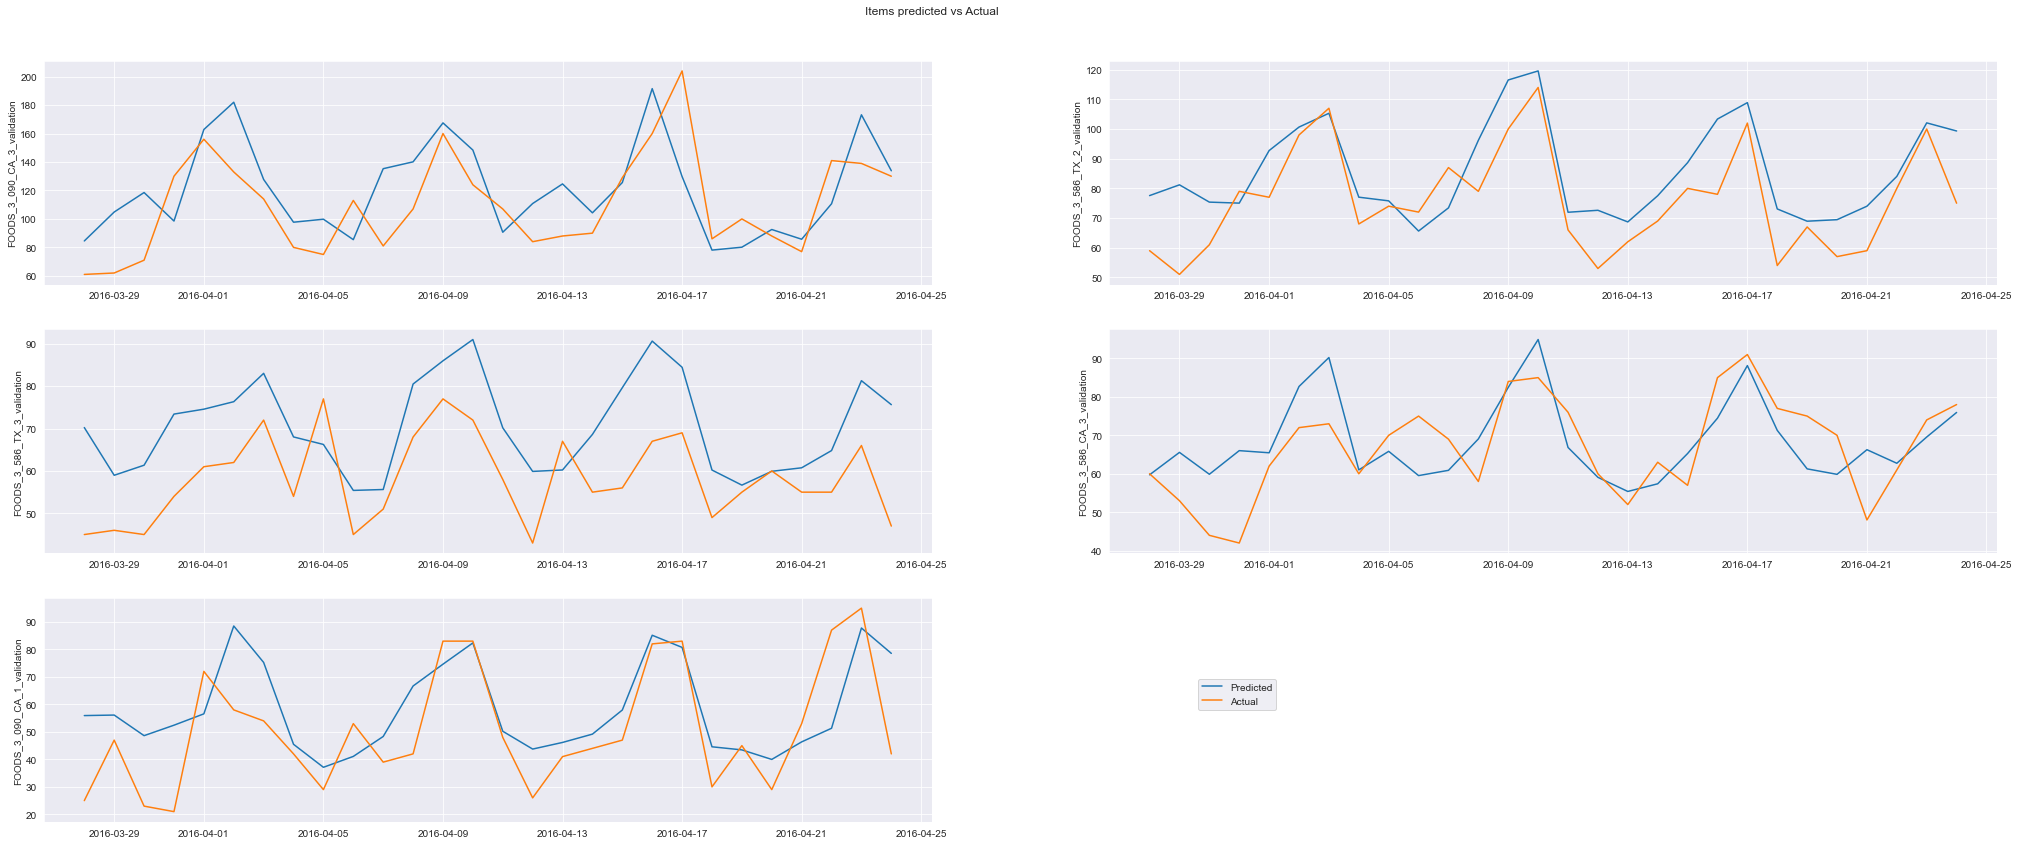

In [55]:
plt.figure(figsize=(35,14))       # set dimensions of the figure
for i in range(1,len(foods_3_top)+1):
    plt.subplot(3,2,i)         # create subplots on a grid with 3 rows and 2 columns
    plt.plot(predictions[foods_3_top[i-1]])
    plt.plot(X[foods_3_top[i-1]])
    plt.ylabel(foods_3_top[i-1])
#     plt.legend(loc=(1.05, 0.5))
plt.legend(loc=(1.3, 0.5),labels=["Predicted","Actual"])
plt.title('Items predicted vs Actual',x=1.0,y=3.58)
plt.show()